# Linear Regression

This program can be used to find the most likely amount of loan a customer requests based on his annual income, home ownership status, the amount of time and returning rate a loan is requested for.

In [176]:
import psycopg2
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
conn = psycopg2.connect("dbname='postgres' user='****' host='localhost' password='****'")
cursor = conn.cursor()

In [164]:
cursor.execute("""SELECT term, int_rate, home_ownership, annual_inc from loans""")
A = cursor.fetchall()
cursor.execute("""SELECT loan_amnt from loans""")
V = cursor.fetchall()
X_train = np.array(A)
X_train = X_train.astype(np.float32)
y = np.array(V)
y = y.astype(np.float32)
y_train = np.zeros(len(y))
for i in np.arange(len(y)):
    y_train[i] = y[i][0]
y_train = y_train.astype(np.float32)

In [184]:
m = y_train.size

scale = preprocessing.StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
temp = np.array(np.zeros(m))
amin = np.amin(y_train)
amax = np.amax(y_train)
for i, e in enumerate(y_train):
    temp[i] = (e - amin)/(amax - amin)
y_train = temp

In [185]:
def computeCost(theta, loss):
    return sum( loss ** 2 ) / (m * 2)

In [191]:
def gradientDescent(theta, iters, alpha):
    J_history = np.zeros(iters)
    for i in np.arange(iters):
        h = np.dot(X_train, theta)
        loss = h - y_train
        gradient = np.dot(np.transpose(X_train), loss) / m
        theta = theta - alpha * gradient
        
        J_history[i] = computeCost(theta, loss)
    return J_history, theta

In [192]:
history, theta = gradientDescent([1,1,1,1], 5000, 0.0005)

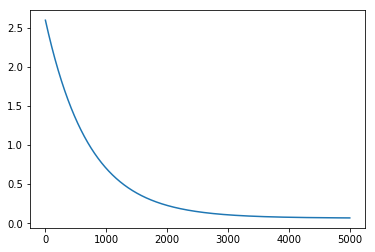

In [193]:
plt.plot(history)
plt.show()

In [194]:
theta

array([ 0.0590184 ,  0.07512087,  0.07273244,  0.08933602])